In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree

In [ ]:
#!pip install lightgbm

In [ ]:
X, y = make_classification(n_features=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42, max_depth=6).fit(X_train,y_train)

In [ ]:
clf.feature_importances_

array([0.05073774, 0.06086483, 0.80708087, 0.08131657])

[Text(0.5, 0.9285714285714286, 'x[2] <= -0.567\ngini = 0.499\nsamples = 67\nvalue = [35, 32]'),
 Text(0.3, 0.7857142857142857, 'x[1] <= -1.93\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.2, 0.6428571428571429, 'x[1] <= -1.995\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.6428571428571429, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.7, 0.7857142857142857, 'x[0] <= -2.291\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(0.6, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.6428571428571429, 'x[3] <= -0.136\ngini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(0.7, 0.5, 'x[2] <= -0.28\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.6, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.35714285714285715, 'x[3] <= -0.148\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text

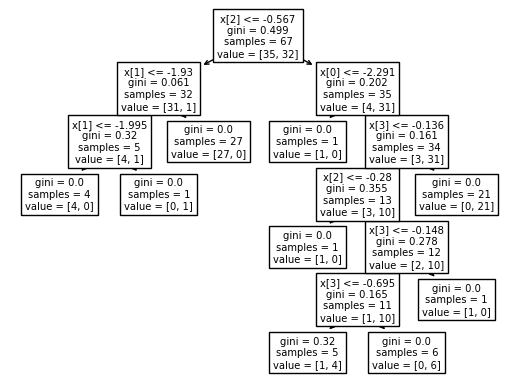

In [ ]:
tree.plot_tree(clf)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
list(zip(X_test, y_pred, y_test))

[(array([-0.86953695,  1.99896877,  1.73590335,  0.25737491]), 1, 1),
 (array([-2.5215955 ,  2.47822554,  1.27458364, -1.5032832 ]), 0, 1),
 (array([-0.04378433, -1.10110026, -1.27395967, -0.8016903 ]), 0, 0),
 (array([-0.00247553,  0.39979927,  0.45139447,  0.26789218]), 1, 1),
 (array([-0.42276158, -0.7692135 , -1.12836011, -1.055126  ]), 0, 0),
 (array([ 0.68766176, -1.36592018, -1.12933108, -0.05783881]), 0, 0),
 (array([-0.48661246, -1.9216172 , -2.47263494, -1.91692582]), 0, 0),
 (array([-0.10017113,  2.17784212,  2.40620516,  1.34986807]), 1, 1),
 (array([-0.0723168 , -0.77366833, -0.92038325, -0.6157487 ]), 0, 0),
 (array([-0.07156026,  0.2295539 ,  0.21654345,  0.06527398]), 1, 1),
 (array([ 0.55626974, -0.58426423, -0.32372692,  0.30616507]), 1, 1),
 (array([ 0.54481881, -1.33330476, -1.17921312, -0.21605254]), 0, 1),
 (array([ 0.35117341, -0.97896912, -0.89552621, -0.22030987]), 0, 0),
 (array([ 1.12073484, -0.32474419,  0.31338067,  1.19466313]), 1, 1),
 (array([-0.76288442

In [ ]:
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        15
     class_1       1.00      0.83      0.91        18

    accuracy                           0.91        33
   macro avg       0.92      0.92      0.91        33
weighted avg       0.92      0.91      0.91        33



##Bagging

In [ ]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_test, y_test)

In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
list(zip(X_test, y_pred_rf, y_test))

[(array([-0.86953695,  1.99896877,  1.73590335,  0.25737491]), 1, 1),
 (array([-2.5215955 ,  2.47822554,  1.27458364, -1.5032832 ]), 1, 1),
 (array([-0.04378433, -1.10110026, -1.27395967, -0.8016903 ]), 0, 0),
 (array([-0.00247553,  0.39979927,  0.45139447,  0.26789218]), 1, 1),
 (array([-0.42276158, -0.7692135 , -1.12836011, -1.055126  ]), 0, 0),
 (array([ 0.68766176, -1.36592018, -1.12933108, -0.05783881]), 0, 0),
 (array([-0.48661246, -1.9216172 , -2.47263494, -1.91692582]), 0, 0),
 (array([-0.10017113,  2.17784212,  2.40620516,  1.34986807]), 1, 1),
 (array([-0.0723168 , -0.77366833, -0.92038325, -0.6157487 ]), 0, 0),
 (array([-0.07156026,  0.2295539 ,  0.21654345,  0.06527398]), 1, 1),
 (array([ 0.55626974, -0.58426423, -0.32372692,  0.30616507]), 1, 1),
 (array([ 0.54481881, -1.33330476, -1.17921312, -0.21605254]), 0, 1),
 (array([ 0.35117341, -0.97896912, -0.89552621, -0.22030987]), 0, 0),
 (array([ 1.12073484, -0.32474419,  0.31338067,  1.19466313]), 1, 1),
 (array([-0.76288442

In [ ]:
print(classification_report(y_test, y_pred_rf, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        15
     class_1       1.00      0.89      0.94        18

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33



##Stacking

In [ ]:
estimators = [
  ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
  ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
  ]
clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
clf_stck = clf_stck.fit(X_train, y_train)


In [ ]:
y_pred_stck = clf_stck.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_stck, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        15
     class_1       1.00      0.89      0.94        18

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33



##Boosting

In [ ]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred_gb = clf_gb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gb, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        15
     class_1       1.00      0.83      0.91        18

    accuracy                           0.91        33
   macro avg       0.92      0.92      0.91        33
weighted avg       0.92      0.91      0.91        33



In [ ]:
clf_lgbm = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lgbm, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        15
     class_1       1.00      0.89      0.94        18

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33

